<a href="https://colab.research.google.com/github/ihyaulumuddin044/Pengantar_ML/blob/main/modules/multiple_linear_regression/multiple_linear_regression_from_scratch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Regresi linier berganda
Mengapa Regresi Linier Berganda?
Regresi linier sederhana mencoba memprediksi satu variabel dependen (Y) berdasarkan satu variabel independen (X). Tapi dalam kenyataannya, banyak hal dipengaruhi oleh lebih dari satu faktor. Di sinilah regresi linier berganda masuk. Ia memungkinkan kita memprediksi variabel dependen berdasarkan dua atau lebih variabel independen.

Contoh: Kita ingin memprediksi harga rumah. Harga rumah tidak hanya ditentukan oleh luasnya, tapi juga jumlah kamar tidur, lokasi, fasilitas terdekat, dan lain-lain.



In [5]:
# Membuat data fiktif
data = {
    'Jam_Belajar': [2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2],
    'Kehadiran_Kelas': [8, 9, 7, 10, 8, 9, 10, 9, 8, 7, 8, 9, 10, 7, 8, 9, 10, 9, 6, 7],
    'Nilai_Ujian': [60, 65, 70, 75, 80, 85, 90, 92, 95, 55, 60, 68, 73, 78, 82, 88, 93, 96, 50, 58]
}

df = pd.DataFrame(data)
print("Dataset:\n", df.head())

Dataset:
    Jam_Belajar  Kehadiran_Kelas  Nilai_Ujian
0            2                8           60
1            3                9           65
2            4                7           70
3            5               10           75
4            6                8           80


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

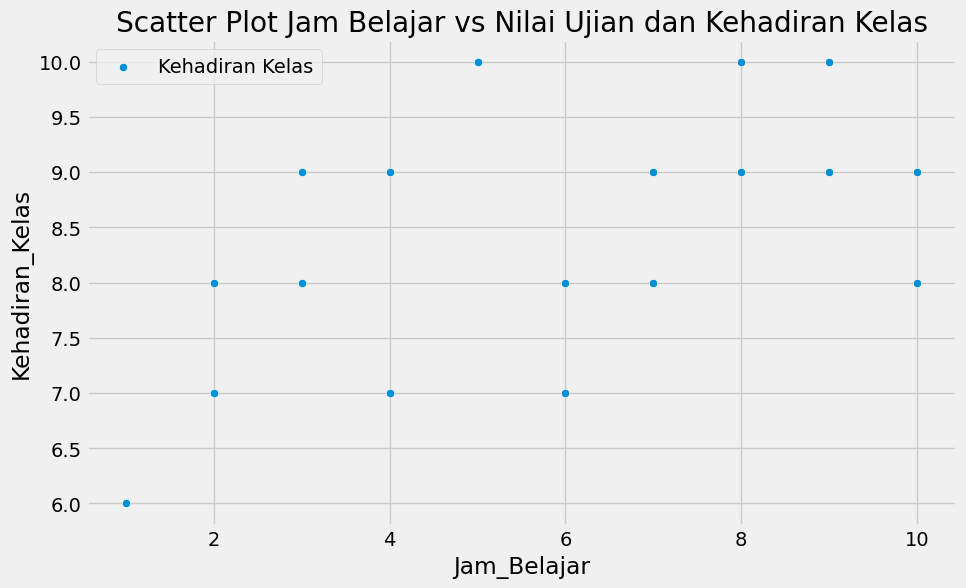

In [25]:
# plot data 2 dimensi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Jam_Belajar', y='Kehadiran_Kelas', label='Kehadiran Kelas')
plt.title('Scatter Plot Jam Belajar vs Nilai Ujian dan Kehadiran Kelas')
plt


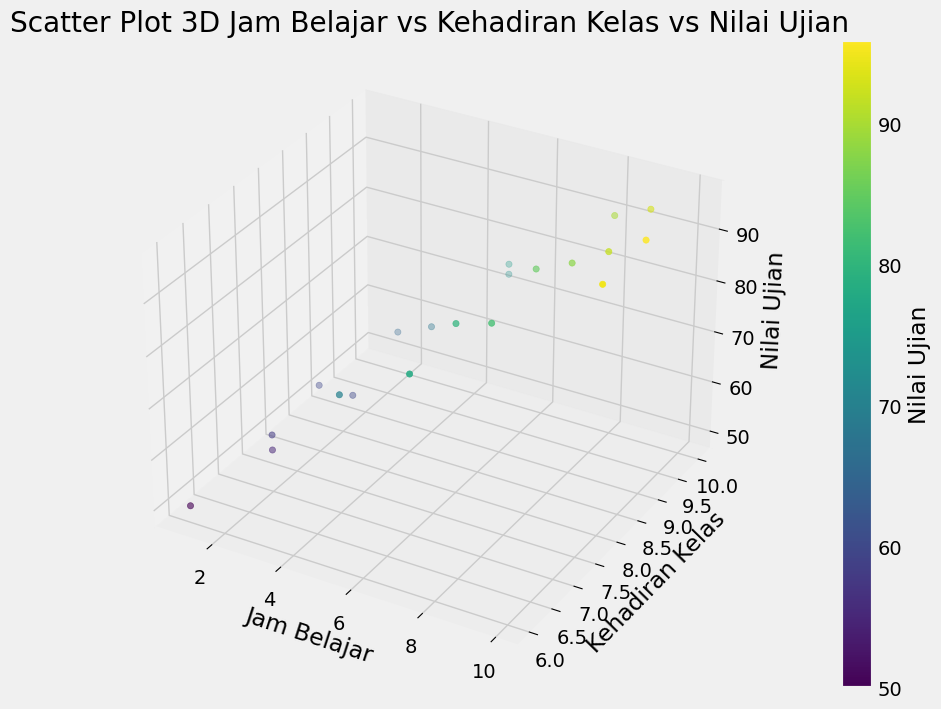

In [24]:
# Import library yang diperlukan untuk plot 3D
from mpl_toolkits.mplot3d import Axes3D

# Visualisasi 3 dimensi
x_jam_belajar = df['Jam_Belajar'].values
x_kehadiran_kelas = df['Kehadiran_Kelas'].values
y_nilai_ujian = df['Nilai_Ujian'].values


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_jam_belajar, x_kehadiran_kelas, y_nilai_ujian, c=y_nilai_ujian, cmap='viridis', marker='o')
ax.set_xlabel('Jam Belajar')
ax.set_ylabel('Kehadiran Kelas')
ax.set_zlabel('Nilai Ujian')
ax.set_title('Scatter Plot 3D Jam Belajar vs Kehadiran Kelas vs Nilai Ujian')
cbar = fig.colorbar(scatter, pad=0.1)
cbar.set_label('Nilai Ujian')
plt.show()

## Membangun Matriks X dan Vektor Y (NumPy)

In [7]:
# Variabel dependen/target (Y)
Y = df['Nilai_Ujian'].values.reshape(-1,1)
# print("Variabel Dependen (Y):\n", Y)
# print("Variabel Dependen (Y):\n", Y.shape)

# Variabel independen (X)
X_raw = df[['Kehadiran_Kelas','Jam_Belajar']].values
# print("Variabel Independen (X):\n", X)
# print("Variabel Independen (X):\n", X.shape)

# Menambahkan kolom konstanta (intercept) ke matriks X
# np.ones((X_raw.shape[0], 1)) membuat kolom berisi angka 1 dengan jumlah baris yang sama dengan X_raw
X = np.concatenate((np.ones((X_raw.shape[0], 1)), X_raw), axis=1)

print("\nMatriks X dengan kolom konstanta (5 baris pertama):\n", X[0:5])
print("\nVektor Y (5 baris pertama):\n", Y[0:5])


Matriks X dengan kolom konstanta (5 baris pertama):
 [[ 1.  8.  2.]
 [ 1.  9.  3.]
 [ 1.  7.  4.]
 [ 1. 10.  5.]
 [ 1.  8.  6.]]

Vektor Y (5 baris pertama):
 [[60]
 [65]
 [70]
 [75]
 [80]]


## Menghitung Koefisien Regresi (β) (NumPy)

Sekarang kita akan menerapkan rumus OLS: β

In [8]:
# Menghitung (X^T X)
XTX = np.dot(X.T, X)
print("Matriks X^T X:\n", XTX)

# Invers dari XTX
XTX_inv= np.linalg.inv(XTX)
print("\nInvers dari Matriks X^T X:\n", XTX_inv)

# Menghitung (X^T Y)
XTY = np.dot(X.T, Y)
print("\nMatriks X^T Y:\n", XTY)

# Menghitung koefisien beta
betas = np.dot(XTX_inv, XTY)

print("\nKoefisien Regresi (beta):\n", betas)

# Ekstrak nilai koefisien
intercept = betas[0][0]
coef_jam_belajar = betas[1][0]
coef_kehadiran_kelas = betas[2][0]

print(f"\nIntercept (beta_0): {intercept:.2f}")
print(f"Koefisien Jam Belajar (beta_1): {coef_jam_belajar:.2f}")
print(f"Koefisien Kehadiran Kelas (beta_2): {coef_kehadiran_kelas:.2f}")

Matriks X^T X:
 [[  20.  168.  111.]
 [ 168. 1438.  967.]
 [ 111.  967.  773.]]

Invers dari Matriks X^T X:
 [[ 2.93252135 -0.37431458  0.04715696]
 [-0.37431458  0.05215845 -0.01149845]
 [ 0.04715696 -0.01149845  0.00890632]]

Matriks X^T Y:
 [[ 1513.]
 [12899.]
 [ 9179.]]

Koefisien Regresi (beta):
 [[41.47475989]
 [ 0.90960752]
 [ 4.78099764]]

Intercept (beta_0): 41.47
Koefisien Jam Belajar (beta_1): 0.91
Koefisien Kehadiran Kelas (beta_2): 4.78


# visualisasi data

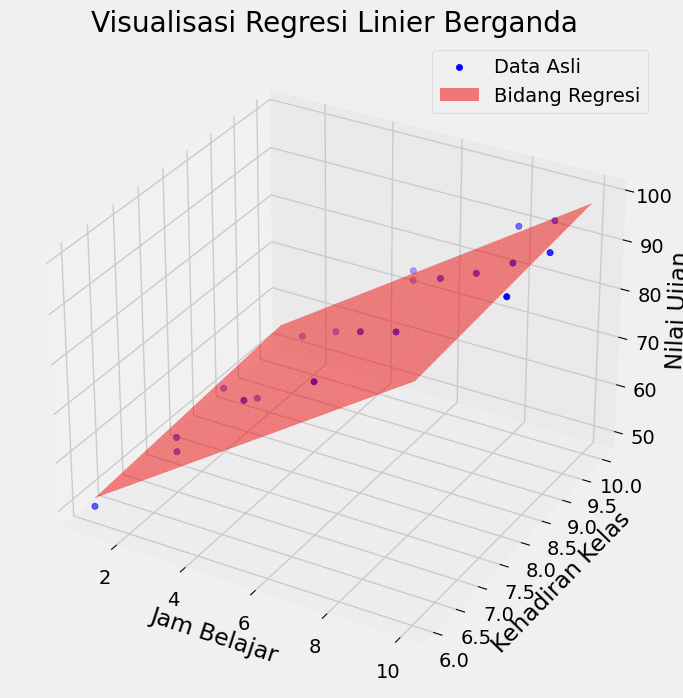

In [27]:
# 1. Import library yang diperlukan
from mpl_toolkits.mplot3d import Axes3D

# 2. Siapkan data untuk plot 3D
x_jam_belajar = df['Jam_Belajar'].values
x_kehadiran_kelas = df['Kehadiran_Kelas'].values
y_nilai_ujian = df['Nilai_Ujian'].values

# 3. Buat plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot data asli
ax.scatter(x_jam_belajar, x_kehadiran_kelas, y_nilai_ujian, c='blue', marker='o', label='Data Asli')

# 4. Siapkan data untuk bidang regresi
# Buat grid nilai untuk Jam_Belajar dan Kehadiran_Kelas
x_surf, y_surf = np.meshgrid(np.linspace(df['Jam_Belajar'].min(), df['Jam_Belajar'].max(), 100),
                             np.linspace(df['Kehadiran_Kelas'].min(), df['Kehadiran_Kelas'].max(), 100))

# Flatten grid untuk prediksi
x_surf_flat = x_surf.flatten()
y_surf_flat = y_surf.flatten()

# Gabungkan dengan kolom konstanta untuk prediksi
# Gunakan koefisien 'betas' yang sudah dihitung sebelumnya
# betas should be available from previous cells if they were run
X_surf_biased = np.concatenate((np.ones((len(x_surf_flat), 1)), x_surf_flat.reshape(-1, 1), y_surf_flat.reshape(-1, 1)), axis=1)

# 5. Hitung prediksi untuk bidang
# Pastikan urutan kolom di X_surf_biased sesuai dengan urutan di 'betas'
# betas[0] = intercept
# betas[1] = coef_kehadiran_kelas (sesuai urutan di X_raw sebelumnya)
# betas[2] = coef_jam_belajar (sesuai urutan di X_raw sebelumnya)

# PERBAIKAN: Urutan kolom di X_raw dan X_surf_biased harus konsisten dengan urutan koefisien di 'betas'
# betas didapat dari X_raw = df[['Kehadiran_Kelas','Jam_Belajar']].values
# Jadi betas[1] adalah koefisien Kehadiran_Kelas, betas[2] adalah koefisien Jam_Belajar.

# Kita perlu membuat X_surf_biased dengan urutan kolom yang sama: [konstanta, Kehadiran_Kelas, Jam_Belajar]
X_surf_biased_corrected = np.concatenate((np.ones((len(x_surf_flat), 1)), y_surf_flat.reshape(-1, 1), x_surf_flat.reshape(-1, 1)), axis=1)


# Hitung prediksi menggunakan koefisien 'betas'
# Pastikan 'betas' sudah terdefinisi dari sel sebelumnya
# Jika belum, jalankan kembali sel yang menghitung 'betas' (_eYQYMxbnPFP)
try:
    z_surf = np.dot(X_surf_biased_corrected, betas)
    z_surf = z_surf.reshape(x_surf.shape) # Reshape kembali ke grid
except NameError:
    print("Error: Variabel 'betas' belum terdefinisi. Harap jalankan sel perhitungan koefisien regresi terlebih dahulu.")
    z_surf = None # Set z_surf ke None jika betas tidak ada


# 6. Plot bidang regresi
if z_surf is not None:
    ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5, label='Bidang Regresi')


# 7. Sesuaikan tampilan plot
ax.set_xlabel('Jam Belajar')
ax.set_ylabel('Kehadiran Kelas')
ax.set_zlabel('Nilai Ujian')
ax.set_title('Visualisasi Regresi Linier Berganda')
ax.legend()

# 8. Tampilkan plot
plt.show()

## Setelah kita mendapatkan koefisien, kita bisa menggunakannya untuk memprediksi nilai ujian baru.

In [28]:
# Contoh prediksi:
# Misal seorang siswa belajar 6 jam dan memiliki kehadiran kelas 9
jam_belajar_baru = 6
kehadiran_kelas_baru = 9

# Buat vektor fitur untuk prediksi (jangan lupa konstanta 1)
data_baru = np.array([1, jam_belajar_baru, kehadiran_kelas_baru])
print("data baru:",data_baru)

# Hitung prediksi
prediksi_nilai = np.dot(data_baru, betas)

print(f"\nPrediksi Nilai Ujian untuk 6 jam belajar dan 9 kehadiran kelas: {prediksi_nilai[0]:.2f}")

data baru: [1 6 9]

Prediksi Nilai Ujian untuk 6 jam belajar dan 9 kehadiran kelas: 89.96


## Evaluasi Model (Optional, tapi Penting)

In [10]:
# Prediksi nilai untuk data yang ada
Y_pred = np.dot(X, betas)

# Menghitung Total Sum of Squares (SST)
# SST = sum((Y_i - Y_mean)^2)
Y_mean = np.mean(Y)
SST = np.sum((Y - Y_mean)**2)

# Menghitung Residual Sum of Squares (SSR)
# SSR = sum((Y_i - Y_pred_i)^2)
SSR = np.sum((Y - Y_pred)**2)

# Menghitung R-squared
R_squared = 1 - (SSR / SST)

print(f"\nR-squared: {R_squared:.4f}")


R-squared: 0.9864


##Visualisai nilan R2

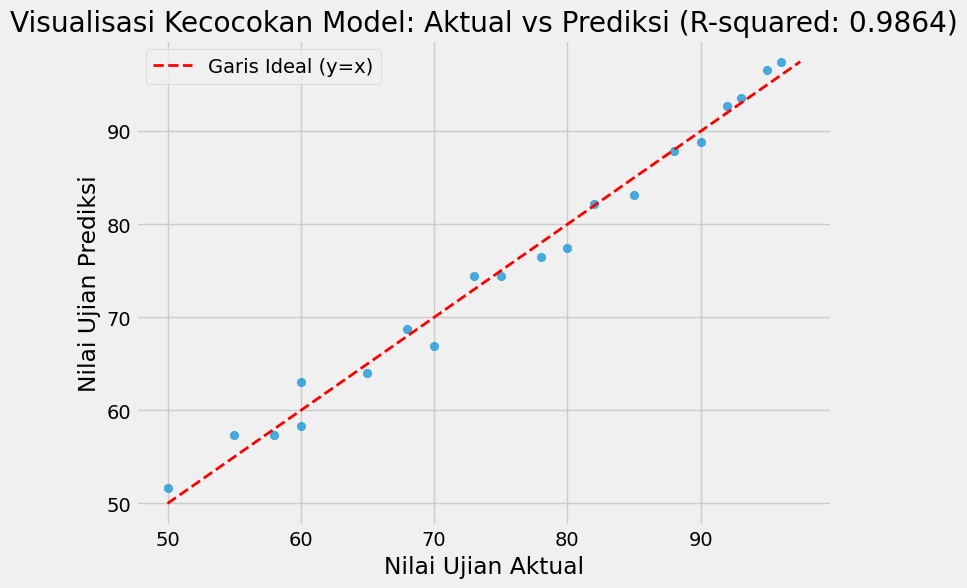

In [30]:
# Asumsikan Y dan Y_pred sudah terdefinisi dari sel sebelumnya
# Y: nilai aktual Nilai_Ujian
# Y_pred: nilai Nilai_Ujian yang diprediksi oleh model OLS manual

# Jika Y atau Y_pred belum ada, Anda perlu menjalankan sel sebelumnya yang menghitungnya.
# Contoh (jika perlu):
# Y = df['Nilai_Ujian'].values.reshape(-1,1)
# X_raw = df[['Kehadiran_Kelas','Jam_Belajar']].values
# X = np.concatenate((np.ones((X_raw.shape[0], 1)), X_raw), axis=1)
# # Asumsikan betas sudah dihitung dari sel sebelumnya
# if 'betas' in locals():
#     Y_pred = np.dot(X, betas)
# else:
#     print("Variabel 'betas' belum terdefinisi. Harap jalankan sel perhitungan koefisien regresi terlebih dahulu.")
#     Y_pred = None


if 'Y' in locals() and 'Y_pred' in locals() and Y_pred is not None:
    # Hitung ulang R-squared untuk memastikan nilainya tersedia
    Y_mean = np.mean(Y)
    SST = np.sum((Y - Y_mean)**2)
    SSR = np.sum((Y - Y_pred)**2)
    # Hindari pembagian dengan nol jika SST adalah nol (kasus data konstan)
    R_squared = 1 - (SSR / SST) if SST != 0 else 1.0


    plt.figure(figsize=(8, 6))
    plt.scatter(Y, Y_pred, alpha=0.7) # Plot nilai Aktual vs Prediksi
    plt.xlabel("Nilai Ujian Aktual")
    plt.ylabel("Nilai Ujian Prediksi")
    # Tambahkan nilai R-squared ke judul
    plt.title(f"Visualisasi Kecocokan Model: Aktual vs Prediksi (R-squared: {R_squared:.4f})")

    # Tambahkan garis diagonal y=x untuk referensi (model sempurna)
    min_val = min(Y.min(), Y_pred.min())
    max_val = max(Y.max(), Y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Garis Ideal (y=x)')

    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Variabel 'Y' atau 'Y_pred' belum terdefinisi. Harap jalankan sel-sel perhitungan regresi terlebih dahulu.")

# Menggunkan Scikit-learn

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_raw, Y)

# Prediksi nilai untuk data yang ada
Y_pred = model.predict(X_raw)

# Menghitung R-squared
R_squared = r2_score(Y, Y_pred)

# mencoba model dengan data baru
jam_belajar_baru = 6
kehadiran_kelas_baru = 9

# Buat vektor fitur untuk prediksi (jangan lupa konstanta 1)
# data_baru = np.array([[1, jam_belajar_baru, kehadiran_kelas_baru]]) # Baris ini menyebabkan error
# data_baru hanya perlu berisi nilai fitur independen, tanpa konstanta 1
data_baru = np.array([[jam_belajar_baru, kehadiran_kelas_baru]])


# Hitung prediksi
prediksi_nilai = model.predict(data_baru)

# PERBAIKAN: Mengakses elemen numerik dalam array NumPy sebelum memformatnya
print(f"prediksi nilai (Scikit-learn): {prediksi_nilai[0][0]:.2f}")
print(f"\nR-squared (Scikit-learn): {R_squared:.4f}")

# Anda juga bisa mencetak koefisien dari model scikit-learn
print(f"\nIntercept (Scikit-learn): {model.intercept_[0]:.2f}")
print(f"Koefisien (Scikit-learn): {model.coef_[0]:}")

prediksi nilai (Scikit-learn): 89.96

R-squared (Scikit-learn): 0.9864

Intercept (Scikit-learn): 41.47
Koefisien (Scikit-learn): [0.90960752 4.78099764]


## Dengan menggunkan Fungsi

In [17]:
def linear_regression_predict(X_train, y_train, X_new):
    """
    Melakukan regresi linier berganda dan membuat prediksi.

    Args:
        X_train (np.ndarray atau pd.DataFrame): Variabel independen untuk training,
                                                 tanpa kolom konstanta (intercept).
        y_train (np.ndarray atau pd.Series): Variabel dependen untuk training.
        X_new (np.ndarray atau pd.DataFrame): Variabel independen untuk prediksi,
                                                tanpa kolom konstanta.

    Returns:
        tuple: (betas, predictions)
               betas (np.ndarray): Koefisien regresi, termasuk intercept.
               predictions (np.ndarray): Prediksi nilai untuk X_new.
    """
    # Pastikan y_train adalah kolom vektor
    if isinstance(y_train, pd.Series):
        y_train = y_train.values.reshape(-1, 1)
    elif isinstance(y_train, np.ndarray) and y_train.ndim == 1:
        y_train = y_train.reshape(-1, 1)

    # Pastikan X_train adalah numpy array
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.values
    if isinstance(X_new, pd.DataFrame):
        X_new = X_new.values

    # Tambahkan kolom konstanta (intercept) ke X_train
    X_train_biased = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)

    # Hitung koefisien beta menggunakan rumus OLS
    try:
        XTX = np.dot(X_train_biased.T, X_train_biased)
        XTX_inv = np.linalg.inv(XTX)
        XTY = np.dot(X_train_biased.T, y_train)
        betas = np.dot(XTX_inv, XTY)
    except np.linalg.LinAlgError:
        print("Peringatan: Matriks tidak dapat di-inverse. Mungkin ada multikolinearitas.")
        return None, None # Atau tangani error dengan cara lain

    # Tambahkan kolom konstanta ke X_new untuk prediksi
    X_new_biased = np.concatenate((np.ones((X_new.shape[0], 1)), X_new), axis=1)

    # Buat prediksi
    predictions = np.dot(X_new_biased, betas)

    return betas, predictions

# --- Contoh Penggunaan Fungsi ---
# Data fiktif seperti sebelumnya
data = {
    'Jam_Belajar': [2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2],
    'Kehadiran_Kelas': [8, 9, 7, 10, 8, 9, 10, 9, 8, 7, 8, 9, 10, 7, 8, 9, 10, 9, 6, 7],
    'Nilai_Ujian': [60, 65, 70, 75, 80, 85, 90, 92, 95, 55, 60, 68, 73, 78, 82, 88, 93, 96, 50, 58]
}
df = pd.DataFrame(data)

# Siapkan data training
X_train_data = df[['Jam_Belajar', 'Kehadiran_Kelas']]
y_train_data = df['Nilai_Ujian']

# Data baru untuk prediksi
X_predict_data = pd.DataFrame({
    'Jam_Belajar': [6, 7.5, 3],
    'Kehadiran_Kelas': [9, 8, 7]
})

# Panggil fungsi
betas_func, predictions_func = linear_regression_predict(X_train_data, y_train_data, X_predict_data)

if betas_func is not None:
    print("\n--- Penggunaan sebagai Fungsi ---")
    print("Koefisien Regresi (Intercept, Jam_Belajar, Kehadiran_Kelas):\n", betas_func.flatten())
    print("Prediksi untuk data baru:\n", predictions_func.flatten())

    # Interpretasi
    print(f"\nInterpretasi:")
    print(f"Intercept: {betas_func[0][0]:.2f}")
    print(f"Koefisien Jam Belajar: {betas_func[1][0]:.2f}")
    print(f"Koefisien Kehadiran Kelas: {betas_func[2][0]:.2f}")


--- Penggunaan sebagai Fungsi ---
Koefisien Regresi (Intercept, Jam_Belajar, Kehadiran_Kelas):
 [41.47475989  4.78099764  0.90960752]
Prediksi untuk data baru:
 [78.34721345 84.60910239 62.18500548]

Interpretasi:
Intercept: 41.47
Koefisien Jam Belajar: 4.78
Koefisien Kehadiran Kelas: 0.91


### catatatn hal-hal penting

* mencari nilai B1 (koifisien/slope)
* mencari nilai B0(Intercept)
* perkalian matrik dengan matrik
* transpose  matrik
* invers matrik


